In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropConstantFeatures

In [6]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-23,4354.169922,4366.549805,4341.339844,4348.330078,4348.330078,6053620000
1,2023-06-22,4355.399902,4382.250000,4351.819824,4381.890137,4381.890137,3511000000
2,2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000
3,2023-06-20,4396.109863,4400.149902,4367.189941,4388.709961,4388.709961,4055790000
4,2023-06-16,4440.950195,4448.470215,4407.439941,4409.589844,4409.589844,6848600000


In [7]:
constant_features = DropConstantFeatures(tol=0.998)
df = constant_features.fit_transform(df)

In [8]:
corr_matrix = df.corr()['Close'].sort_values()
corr_matrix

Volume       0.094835
Date         0.839213
Open         0.998497
High         0.999182
Low          0.999276
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

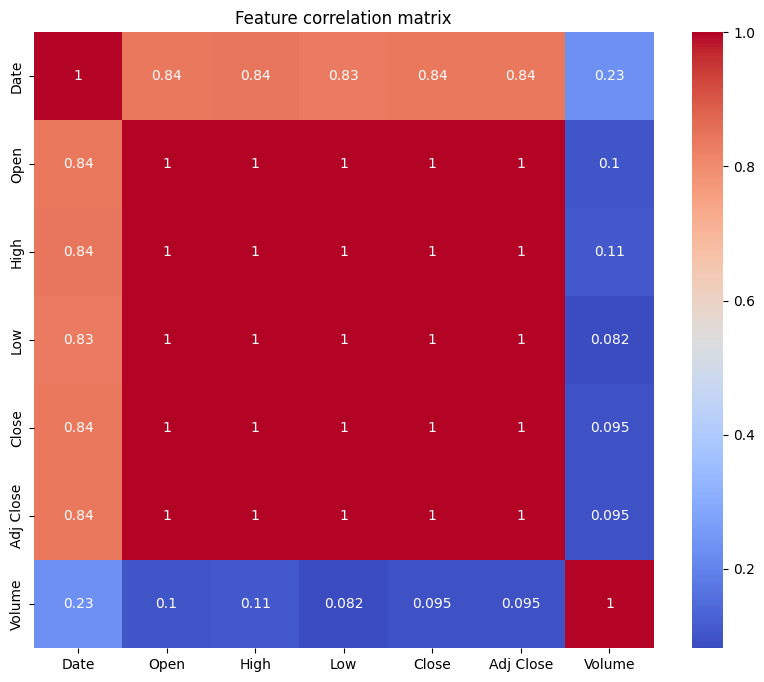

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature correlation matrix')
plt.show()